# Imbalanced dataset
A highly imbalanced dataset is a dataset in which the number of examples in one class greatly outnumbers the other classes. In this Credit Card Fraud Detection dataset, we will work to detect fraudulent transaction from all transactions. Other detection cases usually has similar properties of having examples in one class outnumber other classes

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
raw_df = pd.read_csv('../datasets/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check the basic statistics of the dataset
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check the portion of the positive and negative samples
neg, pos = np.bincount(raw_df['Class'])
print("Total Examples: {}".format(pos + neg))
print("   > Positive: {} \t[{:.2f}%]".format(pos, 100 * pos / (pos + neg)))
print("   > Negative: {} \t[{:.2f}%]".format(neg, 100 * neg / (pos + neg)))

Total Examples: 284807
   > Positive: 492 	[0.17%]
   > Negative: 284315 	[99.83%]


In [6]:
# Remove time column
# Time column is the elapsed time from the first sample timestamp in the dataset, not useful for our purpose
cleaned_df = raw_df.copy()
cleaned_df.pop('Time')

T = cleaned_df.pop('Class')
X = cleaned_df

In [7]:
# Split dataset into train, test, and validation sets
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2) # Train/Test = 80/20
X_train, X_val, T_train, T_val = train_test_split(X_train, T_train, test_size=0.2) # Train/Val = 80/20

print("Train \t: {} \t[{:.2f}%]".format(len(X_train), 100 * len(X_train) / len(X)))
print("Val \t: {} \t[{:.2f}%]".format(len(X_val), 100 * len(X_val) / len(X)))
print("Test \t: {} \t[{:.2f}%]".format(len(X_test), 100 * len(X_test) / len(X)))

# Convert into numpy array
train_labels = np.array(T_train)
val_labels = np.array(T_val)
test_labels = np.array(T_test)

train_inputs = np.array(X_train)
val_inputs = np.array(X_val)
test_inputs = np.array(X_test)

train_labels_bool = train_labels != 1

Train 	: 182276 	[64.00%]
Val 	: 45569 	[16.00%]
Test 	: 56962 	[20.00%]


In [8]:
# Standardization/Normalization
scaler = StandardScaler()
scaler.fit(train_inputs)
print("Mean: \n{}".format(scaler.mean_))
print("STD: \n{}".format(scaler.scale_))

train_inputs = scaler.transform(train_inputs)
val_inputs = scaler.transform(val_inputs)
test_inputs = scaler.transform(test_inputs)

Mean: 
[-2.21179952e-04  5.26233673e-04 -2.23287235e-03 -2.38197065e-04
  8.67191053e-04 -2.80505924e-03 -1.91159053e-03 -4.15592547e-04
  1.98199112e-03 -1.47198035e-03 -7.01903315e-05 -2.94904578e-04
  1.99404432e-03 -1.23674105e-03  6.40469551e-04  6.79119510e-05
 -1.34426989e-03 -1.43066951e-03  3.79130383e-05  1.98392095e-03
 -3.70061010e-04 -2.50531017e-04  1.03017502e-03 -1.38587981e-03
  3.88549369e-04 -5.15281428e-05 -3.27562034e-04 -2.03711537e-04
  8.83690144e+01]
STD: 
[  1.96177936   1.66322656   1.51548008   1.41619541   1.36460936
   1.32453064   1.22580329   1.20559597   1.10096145   1.09737629
   1.0220096    1.00438433   0.99569699   0.96489597   0.915811
   0.87849548   0.8577694    0.83939994   0.81567989   0.76693904
   0.73976944   0.72635111   0.62300749   0.60564761   0.52123367
   0.48224625   0.40349296   0.33209284 247.16740338]


(182276,)


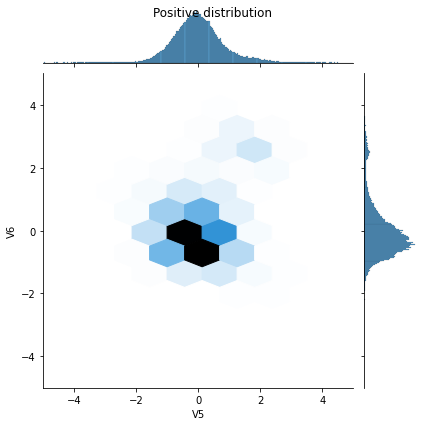

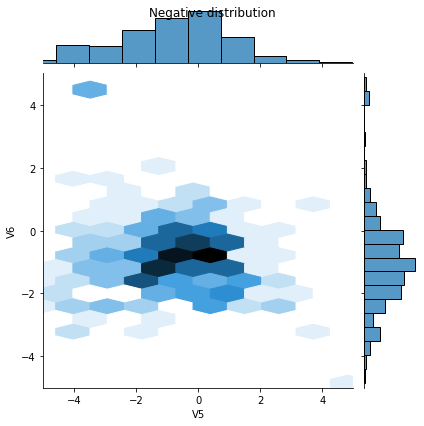

In [9]:
print(train_labels_bool.shape)

pos_df = pd.DataFrame(train_inputs[ train_labels_bool], columns=X_train.columns)
neg_df = pd.DataFrame(train_inputs[~train_labels_bool], columns=X_train.columns)



sns.jointplot(x=pos_df['V5'], y=pos_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")